evaluate_seg_costum.py 在跑

In [30]:
import pandas as pd
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [31]:
import pandas as pd

# 读入 CSV 文件
df = pd.read_csv('evaluate_choco_seg.csv')
# df = pd.read_csv('evaluate_seg.csv')

df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
# df = df[df['classcial'] <= 500]
# df = df[df['in_constraints_probs'] >= 99]


df['pkid_group'] = df['pkid'] % 4

mean_values = df.groupby('method').mean()
mean_values['pkid_group'] = 5
mean_values = mean_values.reset_index()
mean_values
df = pd.concat([df, mean_values], axis=0)
grouped_df = df.groupby(['pkid_group', 'method'], as_index=False).agg({
    'iteration_count':'mean',
    'classcial':'mean',
    'run_times':'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid_group'], columns='method', values=["ARG", 'best_solution_probs', 'classcial', 'run_times','iteration_count'])
# pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=['best_solution_probs','in_constraints_probs',"ARG",'iteration_count'])
method_order = ['ChocoSolver', 'ChocoSegmentedSolver', 'QtoSimplifyDiscardSegmentedCustomSolver']

# method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']

pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['classcial', "ARG",'best_solution_probs','run_times','iteration_count'], method_order]))
pivot_df

classcial                       \
           ChocoSolver ChocoSegmentedSolver   
pkid_group                                    
0             3.941224           102.315509   
1            10.893210           183.949211   
2            43.160829           699.860719   
3            87.977321           795.762394   
5            36.661575           447.364706   

                                                           ARG  \
           QtoSimplifyDiscardSegmentedCustomSolver ChocoSolver   
pkid_group                                                       
0                                         3.228778    0.690573   
1                                        14.991852    2.192354   
2                                        68.030975    5.450593   
3                                       220.754329    7.530385   
5                                        77.015489    3.985369   

                                                                         \
           ChocoSegmentedSolver QtoSimplifyDiscardSegmentedCustomSolver   
pkid_group                                                                
0                      1.260252                                0.069562   
1                      3.709276                                0.425525   
2                      7.225127                                1.780939   
3                     11.444099                                5.349048   
5                      5.934141                                1.913098   

           best_solution_probs                       \
                   ChocoSolver ChocoSegmentedSolver   
pkid_group                                            
0                    76.257047            69.708880   
1                    36.954687            32.356641   
2                    20.516992            18.153711   
3                    10.877963             9.247281   
5                    35.886405            32.137968   

                                                        run_times  \
           QtoSimplifyDiscardSegmentedCustomSolver    ChocoSolver   
pkid_group                                                          
0                                        87.290851  301892.090722   
1                                        60.349023  302178.304000   
2                                        38.320898  302966.784000   
3                                        16.615710  301742.100604   
5                                        50.455450  302197.796165   

                                                                         \
           ChocoSegmentedSolver QtoSimplifyDiscardSegmentedCustomSolver   
pkid_group                                                                
0                  3.027100e+06                              247.121150   
1                  3.033580e+06                              433.786000   
2                  3.028398e+06                              460.752000   
3                  3.028423e+06                              458.871227   
5                  3.029393e+06                              401.046371   

           iteration_count                       \
               ChocoSolver ChocoSegmentedSolver   
pkid_group                                        
0                    301.0                301.0   
1                    301.0                301.0   
2                    301.0                301.0   
3                    301.0                301.0   
5                    301.0                301.0   

                                                    
           QtoSimplifyDiscardSegmentedCustomSolver  
pkid_group                                          
0                                       165.006160  
1                                       288.208000  
2                                       301.000000  
3                                       301.000000  
5                                       264.394657

ChocoSolver
ChocoSegmentedSolver
QtoSimplifyDiscardSegmentedCustomSolver


/tmp/ipykernel_533360/3005482183.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


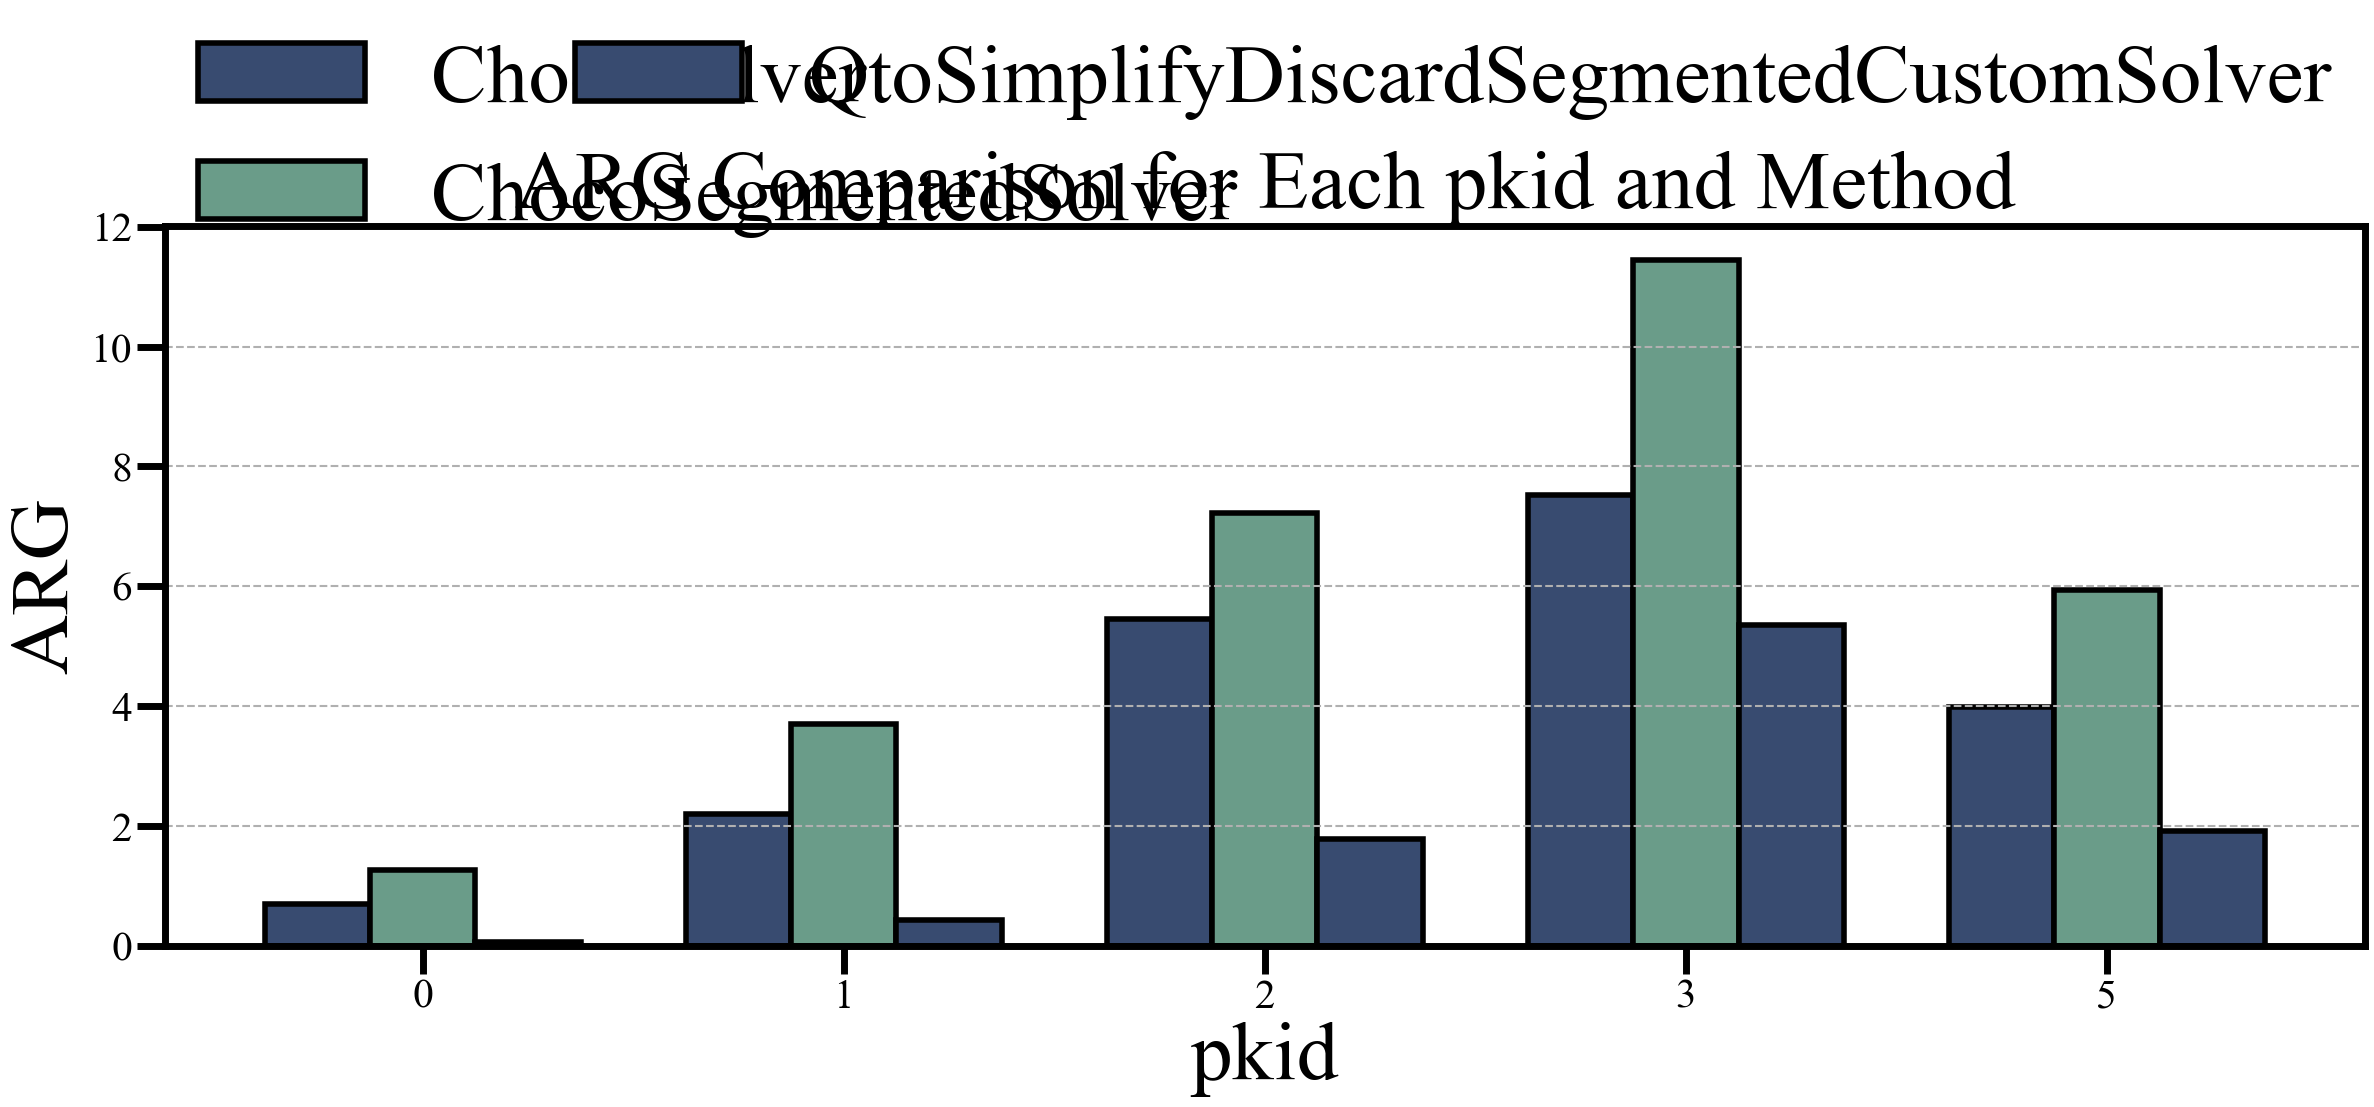

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))  # Create a single subplot for ARG
ax1 = plt.axes((0, 0, 1, 0.6))  
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" : 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})

# Colors for each pkid and method
colors_ = ['#384B70', '#6A9C89']  # Colors for pkid 0 and pkid 1

# Prepare data for plotting ARG per pkid and method
arg_data = pivot_df['ARG']  # Extract ARG data

# Set bar width and x positions
bar_width = 0.25
pkid_values = arg_data.index.get_level_values('pkid_group').unique()  # Get unique pkid values
index = np.arange(len(pkid_values))  # X positions for the bars

# Create a bar chart for each method
for idx, method in enumerate(arg_data.columns):
    print(method)
    ax1.bar(index + idx * bar_width, arg_data[method].values, bar_width, 
            label=method, color=colors_[idx % len(colors_)], edgecolor="black", linewidth=4)

# Customize the plot
ax1.set_xlabel('pkid', fontsize=60)
ax1.set_ylabel('ARG', fontsize=60)
ax1.set_title('ARG Comparison for Each pkid and Method', fontsize=60)

# Set x-axis ticks and labels
ax1.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
ax1.set_xticklabels(pkid_values)

# Add grid, legend, and style
ax1.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

# Save and display the plot
plt.tight_layout()
plt.savefig('ARG_comparison_per_pkid_and_method.svg', bbox_inches='tight')
plt.show()


In [33]:
import pandas as pd

# 读入 CSV 文件
df = pd.read_csv('evaluate_noiseddsim_seg.csv')
# df = pd.read_csv('evaluate_seg.csv')

df = df.drop(columns=['pbid'])
df = df[df['ARG'] <= 100000]
# df = df[df['classcial'] <= 500]
# df = df[df['in_constraints_probs'] >= 99]


df['pkid_group'] = df['pkid'] % 4

# mean_values = df.groupby('method').mean()
# mean_values['pkid_group'] = 5
# mean_values = mean_values.reset_index()
# mean_values
# df = pd.concat([df, mean_values], axis=0)
grouped_df = df.groupby(['pkid_group', 'method'], as_index=False).agg({
    'iteration_count':'mean',
    'classcial':'mean',
    'run_times':'mean',
    "ARG": 'mean',
    'in_constraints_probs': 'mean',
    'best_solution_probs': 'mean',
})

## 分组并把组作为索引
pivot_df = grouped_df.pivot(index =['pkid_group'], columns='method', values=["ARG", 'best_solution_probs', 'classcial', 'run_times','iteration_count'])
# pivot_df = grouped_df.pivot(index =['pkid','variables','constraints'], columns='method', values=['best_solution_probs','in_constraints_probs',"ARG",'iteration_count'])
method_order = ['ChocoSolver', 'ChocoSegmentedSolver', 'QtoSimplifyDiscardSegmentedCustomSolver']

# method_order = ['HeaSolver', 'PenaltySolver', 'ChocoSolver', 'QtoSimplifyDiscardSolver']

pivot_df = pivot_df.reindex(columns=pd.MultiIndex.from_product([['classcial', "ARG",'best_solution_probs','run_times','iteration_count'], method_order]))
pivot_df

classcial                       \
           ChocoSolver ChocoSegmentedSolver   
pkid_group                                    
0             0.954856            80.393455   

                                                           ARG  \
           QtoSimplifyDiscardSegmentedCustomSolver ChocoSolver   
pkid_group                                                       
0                                         0.651549    7.044547   

                                                                         \
           ChocoSegmentedSolver QtoSimplifyDiscardSegmentedCustomSolver   
pkid_group                                                                
0                      6.030013                                1.690035   

           best_solution_probs                       \
                   ChocoSolver ChocoSegmentedSolver   
pkid_group                                            
0                    26.492188            24.259766   

                                                     run_times  \
           QtoSimplifyDiscardSegmentedCustomSolver ChocoSolver   
pkid_group                                                       
0                                        46.205078    97054.72   

                                                                         \
           ChocoSegmentedSolver QtoSimplifyDiscardSegmentedCustomSolver   
pkid_group                                                                
0                     1024409.6                               117227.52   

           iteration_count                       \
               ChocoSolver ChocoSegmentedSolver   
pkid_group                                        
0                    93.78                99.04   

                                                    
           QtoSimplifyDiscardSegmentedCustomSolver  
pkid_group                                          
0                                            37.16

/tmp/ipykernel_533360/3533532377.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


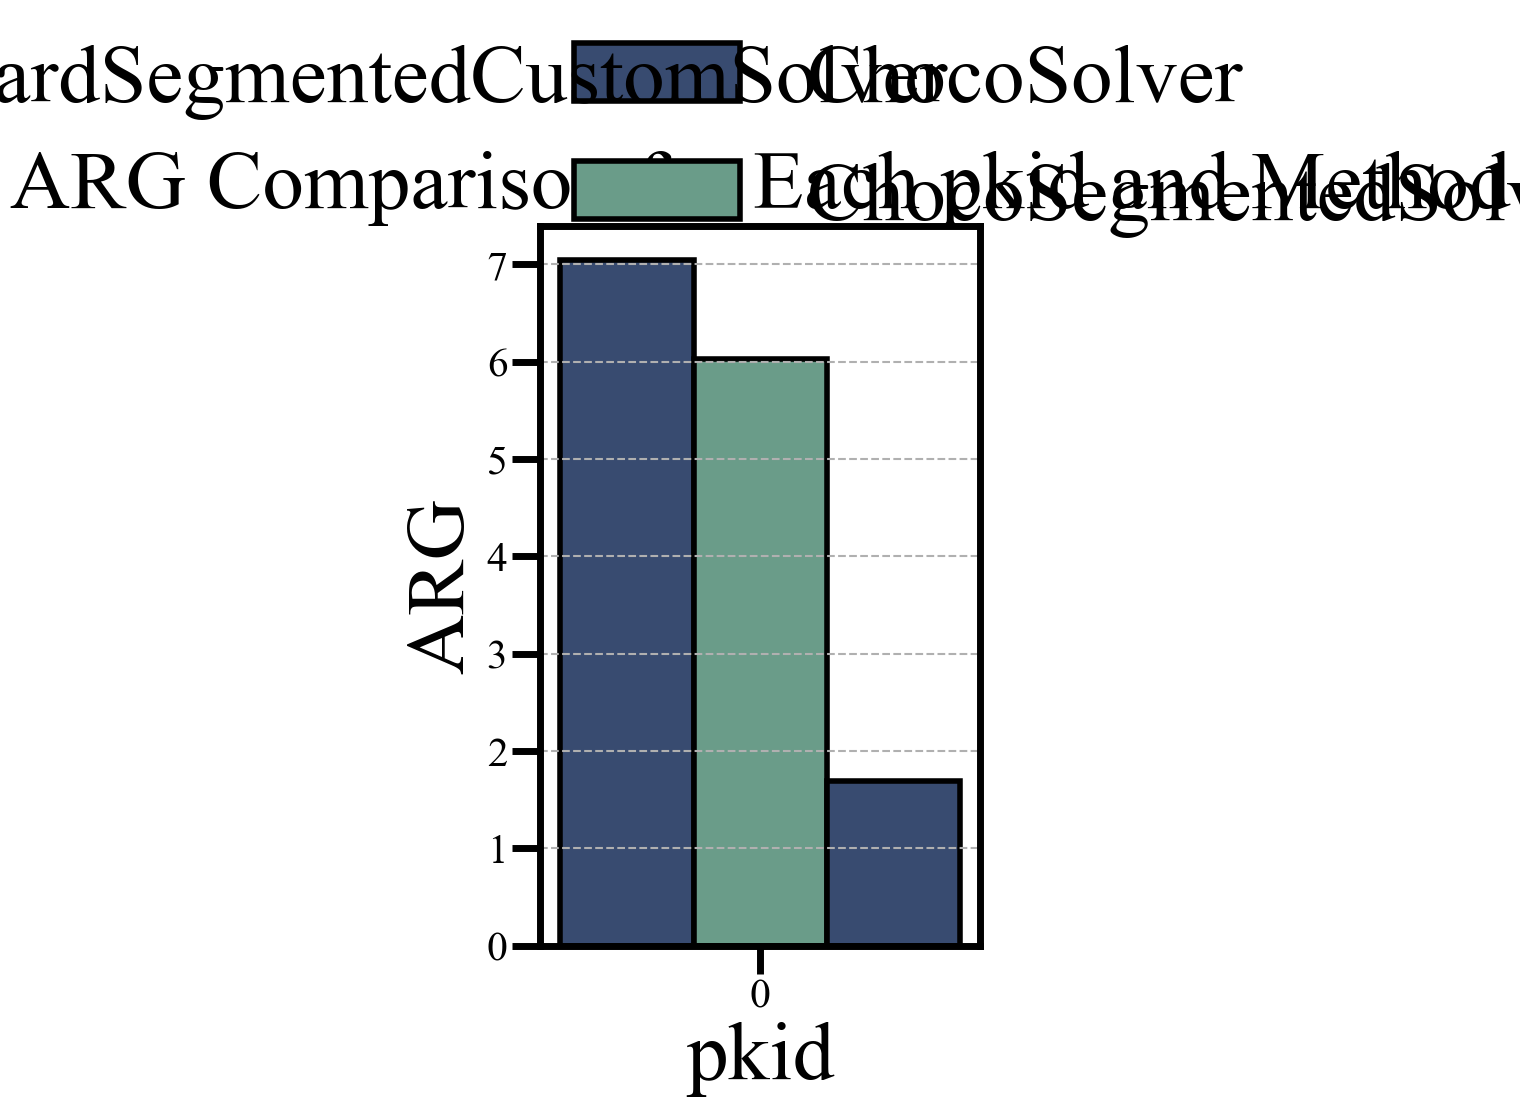

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Initialize the figure and axis settings
scale = 1
fig = plt.figure(figsize=(22*scale, 12*scale))  # Create a single subplot for ARG

mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 60,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'xtick.minor.size': 10,
    'xtick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    "lines.markersize" : 35,
    "lines.markeredgewidth" : 4,
    "markers.fillstyle" : 'full',
    'lines.markerfacecolor': '#f8d941',
    'lines.markeredgecolor': 'black',
})
ax1 = plt.axes((0, 0, 0.2, 0.6))  
# Colors for each pkid and method
colors_ = ['#384B70', '#6A9C89']  # Colors for pkid 0 and pkid 1

# Prepare data for plotting ARG per pkid and method
arg_data = pivot_df['ARG']  # Extract ARG data

# Set bar width and x positions
bar_width = 0.25
pkid_values = arg_data.index.get_level_values('pkid_group').unique()  # Get unique pkid values
index = np.arange(len(pkid_values))  # X positions for the bars

# Create a bar chart for each method
for idx, method in enumerate(arg_data.columns):
    ax1.bar(index + idx * bar_width, arg_data[method].values, bar_width, 
            label=method, color=colors_[idx % len(colors_)], edgecolor="black", linewidth=4)

# Customize the plot
ax1.set_xlabel('pkid', fontsize=60)
ax1.set_ylabel('ARG', fontsize=60)
ax1.set_title('ARG Comparison for Each pkid and Method', fontsize=60)

# Set x-axis ticks and labels
ax1.set_xticks(index + bar_width * (len(arg_data.columns) / 2 - 0.5))
ax1.set_xticklabels(pkid_values)

# Add grid, legend, and style
ax1.grid(True, linestyle='--', linewidth=1.5, axis='y')
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)
ax1.legend(loc='upper left', ncol=2, frameon=False, bbox_to_anchor=(0, 1.1, 1, 0.2), mode="expand", borderaxespad=0)

# Save and display the plot
plt.tight_layout()
plt.savefig('ARG_comparison_per_pkid_and_method.svg', bbox_inches='tight')
plt.show()
